<a href="https://colab.research.google.com/github/ratelist/test_colab/blob/main/telecom_analytics_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Файлы задания https://drive.google.com/drive/folders/1yB-F83PYorHtPyYWJgUGIjXl04z0xQBz?usp=sharing



```
Задание:
В файле Tariff_plans_change.csv содержатся выборочные данные о транзакциях, связанных с подключениями и отключениями тарифных планов абонентами, которые меняли тарифные планы в первом полугодии 2017 года:
SUBSCRIBER_ID	 -  условный идентификатор абонента
TARIFF_PLAN_ID – условный идентификатор тарифного плана
START_DTTM	 - дата и время подключения плана
END_DTTM – дата и время отключения (значение $null$ означает, что план актуален на текущий момент).
В файле Charges.csv содержатся помесячные исторические данные об общих расходах абонентов на мобильную связь:
SUBSCRIBER_ID	 -  условный идентификатор абонента
BILL_MONTH – биллинговый период в формате YYYY-MM-01 (например, строки со значением ‘2016-01-01’ содержат данные о расходах и потреблении за январь 2016 года)
CHARGES – общая сумма  счета за услуги связи
В файле Suspended.csv содержатся исторические данные о блокировках абонентов в транзакционной форме:
SUBSCRIBER_ID	 -  условный идентификатор абонента
START_DT - дата начала блокировки
END_DT – дата окончания блокировки (значение $null$ означает, что абонент остается блокированным на текущий момент).

Необходимо исследовать следующие вопросы:

1. Направления смен тарифных планов: с каких тарифных планов и на какие шли  наибольшие перетоки? Визуализировать потоки миграций на диаграмме.

2. Насколько изменился среднемесячный счет абонентов за период 3 месяца после месяца смены тарифного плана в сравнении с периодом 3 месяца до месяца смены тарифного плана. Какие направления смен тарифных планов характеризовались ростом среднего счета в трехмесячном периоде, а какие – сокращением.  Визуализировать результаты на диаграммах.

3. Аналогично п.2, только относительно изменения уровня блокировок: насколько реже или чаще стали попадать в блокировки абоненты после миграции в целом и для каждого направления миграции в отдельности. Для сравнения использовать те же периоды: 3 месяца до месяца смены плана и 3 месяца после месяца смены.


```



# Перетоки

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np

https://drive.google.com/file/d/1U6Gi6LmG6d6fGhEbBCQnZy0HgR-1WBL7/view?usp=sharing

In [ ]:
# Загрузка файлов с Google Drive
!gdown --id 1U6Gi6LmG6d6fGhEbBCQnZy0HgR-1WBL7

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1U6Gi6LmG6d6fGhEbBCQnZy0HgR-1WBL7
To: /content/task_3.zip
100% 819k/819k [00:00<00:00, 8.15MB/s]


In [ ]:
# Распаковка
! unzip task_3.zip

Archive:  task_3.zip
replace Charges.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Suspended.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Tariff_plans_change.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# Чтение CSV
df = pd.read_csv('/content/Tariff_plans_change.csv')

In [ ]:
df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59
...,...,...,...,...
12339,5987,3,2017-05-23 13:07:57,$null$
12340,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55
12341,5988,4,2017-05-22 16:36:56,$null$
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32


In [ ]:
df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].count().sort_values(ascending=False)

SUBSCRIBER_ID
5929    18
5905    16
2144     8
1524     6
5089     6
        ..
2038     2
2037     2
2036     2
2035     2
5989     2
Name: TARIFF_PLAN_ID, Length: 5989, dtype: int64

In [ ]:
# Посчитаем сколько человек меняло тарифы и сколько раз
df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].count().value_counts()

2     5718
3      233
4       20
6       12
5        3
8        1
16       1
18       1
Name: TARIFF_PLAN_ID, dtype: int64

In [ ]:
# Вставим код для диаграммы перетока
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [ ]:
# Отфильтруем людей, которые меняли тариф более 2х раз, так как их достаточно мало
one_switch = df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].count().reset_index()

In [ ]:
one_switch = one_switch[one_switch['TARIFF_PLAN_ID'] == 2]

In [ ]:
df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59
...,...,...,...,...
12339,5987,3,2017-05-23 13:07:57,$null$
12340,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55
12341,5988,4,2017-05-22 16:36:56,$null$
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32


In [ ]:
df = df.merge(one_switch['SUBSCRIBER_ID'],how='inner',on='SUBSCRIBER_ID')

In [ ]:
# Отфильтровали около тысячи человек
df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59
...,...,...,...,...
11431,5987,3,2017-05-23 13:07:57,$null$
11432,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55
11433,5988,4,2017-05-22 16:36:56,$null$
11434,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32


In [ ]:
df['TARIFF_PLAN_ID'].value_counts()

5    4746
3    2746
1    2022
4    1322
2     600
Name: TARIFF_PLAN_ID, dtype: int64

In [ ]:
clnt_tariff = df.sort_values(['SUBSCRIBER_ID','START_DTTM']).groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].apply(list).reset_index()

In [ ]:
clnt_tariff.sample(5)

,SUBSCRIBER_ID,TARIFF_PLAN_ID
4680,4893,"[1, 5]"
3157,3295,"[3, 5]"
2593,2713,"[2, 4]"
2506,2617,"[3, 5]"
5620,5886,"[3, 5]"


In [ ]:
df[df['SUBSCRIBER_ID']==1707]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
3270,1707,3,2009-05-16 15:35:12,2017-05-04 20:33:03
3271,1707,5,2017-05-04 20:33:04,$null$


In [ ]:
clnt_tariff

,SUBSCRIBER_ID,TARIFF_PLAN_ID
0,1,"[2, 3]"
1,2,"[1, 5]"
2,3,"[1, 5]"
3,4,"[3, 5]"
4,5,"[1, 5]"
...,...,...
5713,5985,"[4, 5]"
5714,5986,"[5, 1]"
5715,5987,"[5, 3]"
5716,5988,"[1, 4]"


In [ ]:
# Выделим в отдельные столбцы начальные и конечные тарифы
clnt_tariff[['t1','t2']] = pd.DataFrame(clnt_tariff['TARIFF_PLAN_ID'].tolist(), index = clnt_tariff.index)

In [ ]:
clnt_tariff

,SUBSCRIBER_ID,TARIFF_PLAN_ID,t1,t2
0,1,"[2, 3]",2,3
1,2,"[1, 5]",1,5
2,3,"[1, 5]",1,5
3,4,"[3, 5]",3,5
4,5,"[1, 5]",1,5
...,...,...,...,...
5713,5985,"[4, 5]",4,5
5714,5986,"[5, 1]",5,1
5715,5987,"[5, 3]",5,3
5716,5988,"[1, 4]",1,4


In [ ]:
switch = clnt_tariff.groupby(['t1','t2'])['SUBSCRIBER_ID'].count().reset_index()

In [ ]:
switch[['t1','t2']] = switch[['t1','t2']].astype('str')

In [ ]:
switch['t1'] = '1_' + switch['t1']

In [ ]:
switch['t2'] = '2_' + switch['t2']

In [ ]:
switch

,t1,t2,SUBSCRIBER_ID
0,1_1,2_2,5
1,1_1,2_3,46
2,1_1,2_4,351
3,1_1,2_5,1544
4,1_2,2_1,13
5,1_2,2_3,15
6,1_2,2_4,139
7,1_2,2_5,406
8,1_3,2_1,17
9,1_3,2_2,7


In [ ]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp

    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))

    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum

    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()

    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))

    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )

    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )

    fig = dict(data=[data], layout=layout)
    return fig

In [ ]:
param = genSankey(switch,cat_cols=['t1','t2'],value_cols='SUBSCRIBER_ID')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = param['data'][0]['node']['label'],
      color = "blue"
    ),
    link = dict(
      source = param['data'][0]['link']['source'], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = param['data'][0]['link']['target'],
      value = param['data'][0]['link']['value']
  )
    )])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [ ]:
# Из диаграммы видно, что больше всего переходят на 5-й тариф. Уходят с тарифов 3 и 1 (Возможно это промо-тарифы)

# Средние чеки

In [ ]:
# Переделаем перетоки более удобным способом

In [ ]:
df.dtypes

SUBSCRIBER_ID      int64
TARIFF_PLAN_ID     int64
START_DTTM        object
END_DTTM          object
dtype: object

In [ ]:
# Переведём в формат даты
df['START_DTTM'] = pd.to_datetime(df['START_DTTM'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Переведём в формат даты с учётом исключения NULL
df['END_DTTM'] = pd.to_datetime(df['END_DTTM'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [ ]:
df.dtypes

SUBSCRIBER_ID              int64
TARIFF_PLAN_ID             int64
START_DTTM        datetime64[ns]
END_DTTM          datetime64[ns]
dtype: object

In [ ]:
# Пронумеровали тарифы
df['tariff_number'] = df.groupby('SUBSCRIBER_ID')['START_DTTM'].rank(method='first')

In [ ]:
df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,1.0
1,1,3,2017-03-11 14:24:18,NaT,2.0
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58,1.0
3,2,5,2017-06-29 12:39:59,NaT,2.0
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59,1.0
...,...,...,...,...,...
11431,5987,3,2017-05-23 13:07:57,NaT,2.0
11432,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55,1.0
11433,5988,4,2017-05-22 16:36:56,NaT,2.0
11434,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32,1.0


In [ ]:
# Сводник с пронумерованными переключениями
df.pivot_table(index='SUBSCRIBER_ID',columns='tariff_number',values='TARIFF_PLAN_ID')

tariff_number,1.0,2.0
SUBSCRIBER_ID,,
1,2,3
2,1,5
3,1,5
4,3,5
5,1,5
...,...,...
5985,4,5
5986,5,1
5987,5,3


In [ ]:
# Переведём в str для того, чтобы сработала агрегация (так как можно суммировать строки, но не даты)
df['start_dt'] = df['START_DTTM'].astype('str')

In [ ]:
# Агрегируем по датам
df.pivot_table(index='SUBSCRIBER_ID',columns='tariff_number',values='start_dt',aggfunc='sum')

tariff_number,1.0,2.0
SUBSCRIBER_ID,,
1,2013-11-22 21:10:08,2017-03-11 14:24:18
2,2016-02-05 16:36:34,2017-06-29 12:39:59
3,2015-05-06 19:17:46,2017-04-14 12:01:00
4,2016-01-27 23:03:51,2017-01-09 19:27:51
5,2016-02-06 08:07:15,2017-05-08 12:40:00
...,...,...
5985,2017-04-14 14:01:33,2017-06-17 15:00:47
5986,2017-05-01 11:28:36,2017-06-27 17:45:07
5987,2017-05-08 17:27:21,2017-05-23 13:07:57


Насколько изменился среднемесячный счет абонентов за период 3 месяца после месяца смены тарифного плана в сравнении с периодом 3 месяца до месяца смены тарифного плана. Какие направления смен тарифных планов характеризовались ростом среднего счета в трехмесячном периоде, а какие – сокращением. Визуализировать результаты на диаграммах.

In [ ]:
df['START_DTTM'].agg(['min','max'])

min   1999-07-12 12:55:54
max   2017-06-30 23:51:34
Name: START_DTTM, dtype: datetime64[ns]

In [ ]:
df['start_month'] = df['START_DTTM'].to_numpy().astype('datetime64[M]')

<Axes: xlabel='start_month'>

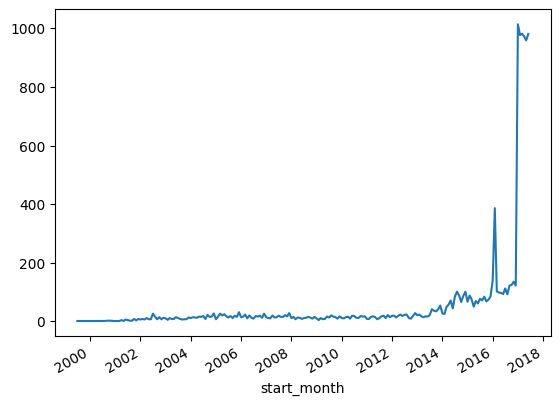

In [ ]:
# Посмотрим в каком году были смены тарифов
df.groupby('start_month')['SUBSCRIBER_ID'].count().plot()

<Axes: xlabel='start_month'>

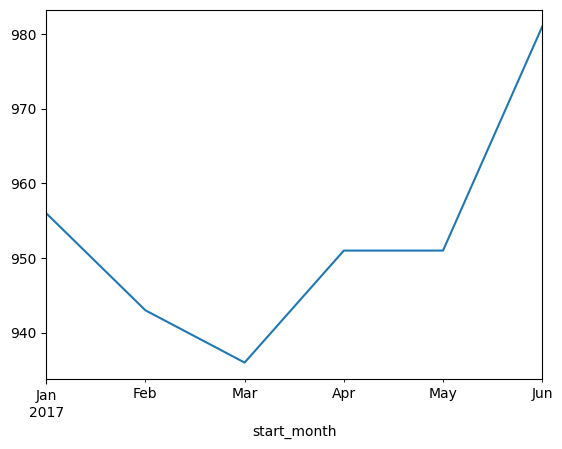

In [ ]:
df[df['tariff_number'] == 2].groupby('start_month')['SUBSCRIBER_ID'].count().plot()

In [ ]:
df[df['tariff_number'] == 2]['start_month'].value_counts()

2017-06-01    981
2017-01-01    956
2017-04-01    951
2017-05-01    951
2017-02-01    943
2017-03-01    936
Name: start_month, dtype: int64

In [ ]:
# Загрузим платежи
ch = pd.read_csv('Charges.csv')

In [ ]:
ch

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610
...,...,...,...
112590,4992,2016-10-01,8.078
112591,4747,2016-10-01,4.862
112592,4992,2016-11-01,9.978
112593,4747,2017-06-01,5.182


In [ ]:
ch['BILL_MONTH'].value_counts()

2017-10-01    5989
2017-09-01    5989
2017-08-01    5989
2017-05-01    5989
2017-06-01    5989
2017-11-01    5989
2017-12-01    5989
2017-07-01    5989
2017-04-01    5985
2017-03-01    5980
2017-02-01    5959
2017-01-01    5948
2016-12-01    5931
2016-11-01    5905
2016-10-01    5874
2016-09-01    5836
2016-08-01    5800
2016-07-01    5756
2016-06-01    5709
Name: BILL_MONTH, dtype: int64

In [ ]:
abons = df[df['tariff_number'] == 2].copy()

In [ ]:
# Приджойним первый тариф
first_tariff = df[df['tariff_number'] == 1][['SUBSCRIBER_ID','TARIFF_PLAN_ID','START_DTTM']].copy()

In [ ]:
first_tariff.columns

Index(['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'START_DTTM'], dtype='object')

In [ ]:
first_tariff.columns = ['SUBSCRIBER_ID', 'TARIFF_PLAN_ID_FIRST', 'START_DTTM_FIRST']

In [ ]:
abons = abons.merge(first_tariff,how='left',on='SUBSCRIBER_ID')

In [ ]:
# Получаем всю информацию по абонентам - первый и второй тарифный планы, их даты начала и когортой будет start_month
abons

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST
0,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03-11 14:24:18,2017-03-01,2,2013-11-22 21:10:08
1,2,5,2017-06-29 12:39:59,NaT,2.0,2017-06-29 12:39:59,2017-06-01,1,2016-02-05 16:36:34
2,3,5,2017-04-14 12:01:00,NaT,2.0,2017-04-14 12:01:00,2017-04-01,1,2015-05-06 19:17:46
3,4,5,2017-01-09 19:27:51,NaT,2.0,2017-01-09 19:27:51,2017-01-01,3,2016-01-27 23:03:51
4,5,5,2017-05-08 12:40:00,NaT,2.0,2017-05-08 12:40:00,2017-05-01,1,2016-02-06 08:07:15
...,...,...,...,...,...,...,...,...,...
5713,5985,5,2017-06-17 15:00:47,NaT,2.0,2017-06-17 15:00:47,2017-06-01,4,2017-04-14 14:01:33
5714,5986,1,2017-06-27 17:45:07,NaT,2.0,2017-06-27 17:45:07,2017-06-01,5,2017-05-01 11:28:36
5715,5987,3,2017-05-23 13:07:57,NaT,2.0,2017-05-23 13:07:57,2017-05-01,5,2017-05-08 17:27:21
5716,5988,4,2017-05-22 16:36:56,NaT,2.0,2017-05-22 16:36:56,2017-05-01,1,2017-05-10 10:36:53


In [ ]:
# Переведём дату
ch['BILL_MONTH'] = pd.to_datetime(ch['BILL_MONTH'],format='%Y-%m-%d')

In [ ]:
# Посмотрим счета абонента 4741
ch[ch['SUBSCRIBER_ID'] == 4741]

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
62,4741,2016-07-01,4.106
124,4741,2016-12-01,5.078
186,4741,2017-12-01,5.004
248,4741,2017-08-01,5.044
310,4741,2017-02-01,4.572
372,4741,2017-07-01,5.024
434,4741,2016-09-01,4.232
496,4741,2017-11-01,5.686
558,4741,2016-08-01,6.896


In [ ]:
# И посмотрим его в abons
abons[abons['SUBSCRIBER_ID'] == 4741]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST
4533,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20


для абонента 4741 (месяцы до 03,04,05) ----- '2017-06-01' ----- (07,08,09 месяцы после)

In [ ]:
ch

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610
...,...,...,...
112590,4992,2016-10-01,8.078
112591,4747,2016-10-01,4.862
112592,4992,2016-11-01,9.978
112593,4747,2017-06-01,5.182


In [ ]:
abons

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST
0,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03-11 14:24:18,2017-03-01,2,2013-11-22 21:10:08
1,2,5,2017-06-29 12:39:59,NaT,2.0,2017-06-29 12:39:59,2017-06-01,1,2016-02-05 16:36:34
2,3,5,2017-04-14 12:01:00,NaT,2.0,2017-04-14 12:01:00,2017-04-01,1,2015-05-06 19:17:46
3,4,5,2017-01-09 19:27:51,NaT,2.0,2017-01-09 19:27:51,2017-01-01,3,2016-01-27 23:03:51
4,5,5,2017-05-08 12:40:00,NaT,2.0,2017-05-08 12:40:00,2017-05-01,1,2016-02-06 08:07:15
...,...,...,...,...,...,...,...,...,...
5713,5985,5,2017-06-17 15:00:47,NaT,2.0,2017-06-17 15:00:47,2017-06-01,4,2017-04-14 14:01:33
5714,5986,1,2017-06-27 17:45:07,NaT,2.0,2017-06-27 17:45:07,2017-06-01,5,2017-05-01 11:28:36
5715,5987,3,2017-05-23 13:07:57,NaT,2.0,2017-05-23 13:07:57,2017-05-01,5,2017-05-08 17:27:21
5716,5988,4,2017-05-22 16:36:56,NaT,2.0,2017-05-22 16:36:56,2017-05-01,1,2017-05-10 10:36:53


In [ ]:
# Джойним

In [ ]:
len(ch[(ch['CHARGES']>0)&(ch['CHARGES']<20)]) / len(ch)

0.9481238065633465

<Axes: >

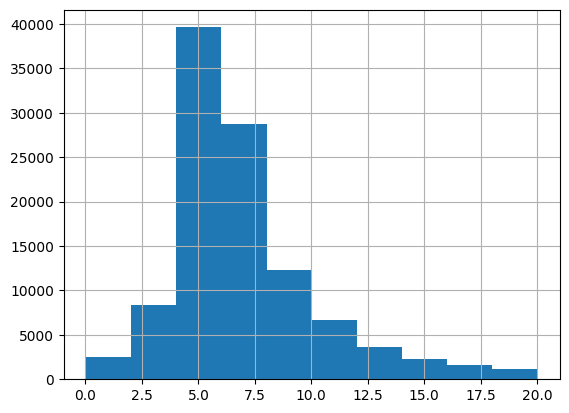

In [ ]:
ch[(ch['CHARGES']>0)&(ch['CHARGES']<20)]['CHARGES'].hist()

In [ ]:
ch = ch[(ch['CHARGES']>0)&(ch['CHARGES']<20)]

In [ ]:
abons_ch = abons.merge(ch,how='left',on='SUBSCRIBER_ID')

In [ ]:
# Делаем month_between для сортировки 3-х месяцев до и после перехода
abons_ch['month_between'] = round((abons_ch['start_month'] - abons_ch['BILL_MONTH']).dt.days / 30)

In [ ]:
abons_ch[abons_ch['SUBSCRIBER_ID']== 4741].sort_values('month_between')

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,BILL_MONTH,CHARGES,month_between
82514,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-12-01,5.004,-6.0
82519,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-11-01,5.686,-5.0
82522,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-10-01,4.984,-4.0
82526,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-09-01,5.610,-3.0
82515,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-08-01,5.044,-2.0
82517,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-07-01,5.024,-1.0
82528,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-05-01,4.964,1.0
82521,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-04-01,4.852,2.0
82511,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-03-01,4.572,3.0
82516,4741,5,2017-06-22 12:07:54,NaT,2.0,2017-06-22 12:07:54,2017-06-01,1,2007-12-18 18:50:20,2017-02-01,4.572,4.0


In [ ]:
# Отфильтруем по трём месяцам

In [ ]:
prev = (abons_ch[abons_ch['month_between'].isin([1,2,3])]
        .groupby('SUBSCRIBER_ID')['CHARGES']
        .agg(['count','sum','mean']).reset_index())

In [ ]:
after = (abons_ch[abons_ch['month_between'].isin([-1,-2,-3])]
         .groupby('SUBSCRIBER_ID')['CHARGES']
         .agg(['count','sum','mean']).reset_index())

In [ ]:
prev.columns = ['SUBSCRIBER_ID', 'count_prev', 'sum_prev', 'mean_prev']

In [ ]:
after.columns = ['SUBSCRIBER_ID', 'count_after', 'sum_after', 'mean_after']

In [ ]:
abons = abons.merge(prev,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons = abons.merge(after,how='left',on='SUBSCRIBER_ID')

In [ ]:
# Получили для каждого абонента сколько было до смены и после
abons

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,count_prev,sum_prev,mean_prev,count_after,sum_after,mean_after
0,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03-11 14:24:18,2017-03-01,2,2013-11-22 21:10:08,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5,2017-06-29 12:39:59,NaT,2.0,2017-06-29 12:39:59,2017-06-01,1,2016-02-05 16:36:34,3.0,16.775,5.591667,3.0,15.396,5.132000
2,3,5,2017-04-14 12:01:00,NaT,2.0,2017-04-14 12:01:00,2017-04-01,1,2015-05-06 19:17:46,3.0,15.579,5.193000,3.0,14.992,4.997333
3,4,5,2017-01-09 19:27:51,NaT,2.0,2017-01-09 19:27:51,2017-01-01,3,2016-01-27 23:03:51,3.0,20.010,6.670000,3.0,14.436,4.812000
4,5,5,2017-05-08 12:40:00,NaT,2.0,2017-05-08 12:40:00,2017-05-01,1,2016-02-06 08:07:15,3.0,11.161,3.720333,3.0,14.364,4.788000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,5985,5,2017-06-17 15:00:47,NaT,2.0,2017-06-17 15:00:47,2017-06-01,4,2017-04-14 14:01:33,2.0,11.084,5.542000,3.0,15.409,5.136333
5714,5986,1,2017-06-27 17:45:07,NaT,2.0,2017-06-27 17:45:07,2017-06-01,5,2017-05-01 11:28:36,1.0,14.359,14.359000,3.0,45.613,15.204333
5715,5987,3,2017-05-23 13:07:57,NaT,2.0,2017-05-23 13:07:57,2017-05-01,5,2017-05-08 17:27:21,NaN,NaN,NaN,3.0,11.619,3.873000
5716,5988,4,2017-05-22 16:36:56,NaT,2.0,2017-05-22 16:36:56,2017-05-01,1,2017-05-10 10:36:53,NaN,NaN,NaN,3.0,28.654,9.551333


In [ ]:
t = (abons[(abons['count_prev']==3)&(abons['count_after']==3)]
     [['mean_prev','mean_after']].agg(['mean','median']))

In [ ]:
t['%'] = (t['mean_after'] - t['mean_prev'])/t['mean_prev']

In [ ]:
# Абоненты в среднем стали платить меньше

In [ ]:
t

,mean_prev,mean_after,%
mean,7.43025,6.146329,-0.172796
median,7.13000,5.486167,-0.230552


In [ ]:
# Посиотрим по когортам
t = (abons[(abons['count_prev']==3)&(abons['count_after']==3)]
     .groupby('start_month')[['mean_prev','mean_after']]
     .agg(['count','mean','median']))

In [ ]:
t['change'] = (t['mean_after']['mean'] - t['mean_prev']['mean'])/t['mean_prev']['mean']

In [ ]:
t

mean_prev                     mean_after                      \
                count      mean    median      count      mean    median   
start_month                                                                
2017-01-01        806  7.241488  6.911167        806  5.609489  5.019667   
2017-02-01        779  7.089924  6.903000        779  5.779802  5.241667   
2017-03-01        764  7.017964  6.847833        764  5.950166  5.429333   
2017-04-01        775  7.513720  7.239000        775  6.334925  5.655000   
2017-05-01        764  7.615661  7.238000        764  6.636961  5.780667   
2017-06-01        802  8.085987  7.733000        802  6.579101  5.779833   

               change  
                       
start_month            
2017-01-01  -0.225368  
2017-02-01  -0.184786  
2017-03-01  -0.152152  
2017-04-01  -0.156886  
2017-05-01  -0.128512  
2017-06-01  -0.186358

In [ ]:
 t = (abons[(abons['count_prev']==3)&(abons['count_after']==3)]
      .groupby(['TARIFF_PLAN_ID_FIRST','TARIFF_PLAN_ID'])
      [['mean_prev','mean_after']]
      .agg(['count','median']).reset_index())

In [ ]:
t.columns = ['TARIFF_PLAN_ID_FIRST','TARIFF_PLAN_ID','cnt','before','_','after']

In [ ]:
t['charge'] = (t['after'] - t['before'])/t['before']

In [ ]:
t.sort_values('cnt',ascending=False)

,TARIFF_PLAN_ID_FIRST,TARIFF_PLAN_ID,cnt,before,_,after,charge
11,3,5,2006,7.773167,2006,5.668667,-0.270739
3,1,5,1212,6.562833,1212,5.475000,-0.165757
7,2,5,341,5.715333,341,5.577667,-0.024087
15,4,5,322,5.434000,322,5.600167,0.030579
2,1,4,295,5.193000,295,3.178000,-0.388022
10,3,4,221,7.001333,221,4.214667,-0.398019
6,2,4,122,2.944667,122,3.544500,0.203702
1,1,3,34,7.558167,34,7.659167,0.013363
12,4,1,23,6.237333,23,5.952000,-0.045746
14,4,3,21,6.594000,21,7.804000,0.183500


In [ ]:
# Самое большое количество людей перешло с тарифа 3 на тариф 5, при этом их чек снизился на 27%, с 1 на 5 и -16%.

# Блокировки

In [ ]:
suspended = pd.read_csv('/content/Suspended.csv')

In [ ]:
# Преобразование столбцов дат начала и окончания блокировки в формат datetime
suspended['START_DT'] = pd.to_datetime(suspended['START_DT'],
                                       format='%Y-%m-%d',
                                       errors='coerce')

In [ ]:
suspended['END_DT'] = pd.to_datetime(suspended['END_DT'],
                                     format='%Y-%m-%d',
                                     errors='coerce')

In [ ]:
suspended

,SUBSCRIBER_ID,START_DT,END_DT,STATUS
0,5195,2017-12-27,2017-12-27,Suspended
1,5198,2017-04-18,2017-04-18,Suspended
2,381,2017-04-18,2017-04-20,Suspended
3,3500,2017-12-21,NaT,Suspended
4,3302,2016-08-23,2016-09-07,Suspended
...,...,...,...,...
4058,2166,2016-07-23,2016-07-24,Suspended
4059,2166,2016-07-02,2016-07-05,Suspended
4060,2166,2016-06-18,2016-06-21,Suspended
4061,2166,2016-06-11,2016-06-11,Suspended


In [ ]:
suspended['STATUS'].value_counts()

Suspended    4063
Name: STATUS, dtype: int64

In [ ]:
# Добавление столбца с месяцем начала блокировки
suspended['start_month_sus'] = suspended['START_DT'].to_numpy().astype('datetime64[M]')

In [ ]:
abons_sus = abons.merge(suspended,how='left',on='SUBSCRIBER_ID')

In [ ]:
# Подсчет уникальных id подписчиков в каждой таблице
abons['SUBSCRIBER_ID'].nunique()

5718

In [ ]:
suspended['SUBSCRIBER_ID'].nunique()

1310

In [ ]:
# Вычисление разницы в месяцах между началом подписки и блокировки
abons_sus['month_between'] = round((abons_sus['start_month'] - abons_sus['start_month_sus']).dt.days / 30)

In [ ]:
prev = (abons_sus[abons_sus['month_between'].isin([1,2,3])]
        .groupby('SUBSCRIBER_ID')['STATUS']
        .agg(['count']).reset_index())

In [ ]:
after = (abons_sus[abons_sus['month_between'].isin([-1,-2,-3])]
        .groupby('SUBSCRIBER_ID')['STATUS']
        .agg(['count']).reset_index())

In [ ]:
prev.columns = ['SUBSCRIBER_ID', 'count_prev_sus']

In [ ]:
after.columns = ['SUBSCRIBER_ID', 'count_after_sus']

In [ ]:
abons = abons.merge(prev,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons = abons.merge(after,how='left',on='SUBSCRIBER_ID')

In [ ]:
abons

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,count_prev,sum_prev,mean_prev,count_after,sum_after,mean_after,count_prev_sus,count_after_sus
0,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03-11 14:24:18,2017-03-01,2,2013-11-22 21:10:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5,2017-06-29 12:39:59,NaT,2.0,2017-06-29 12:39:59,2017-06-01,1,2016-02-05 16:36:34,3.0,16.775,5.591667,3.0,15.396,5.132000,NaN,NaN
2,3,5,2017-04-14 12:01:00,NaT,2.0,2017-04-14 12:01:00,2017-04-01,1,2015-05-06 19:17:46,3.0,15.579,5.193000,3.0,14.992,4.997333,NaN,NaN
3,4,5,2017-01-09 19:27:51,NaT,2.0,2017-01-09 19:27:51,2017-01-01,3,2016-01-27 23:03:51,3.0,20.010,6.670000,3.0,14.436,4.812000,NaN,NaN
4,5,5,2017-05-08 12:40:00,NaT,2.0,2017-05-08 12:40:00,2017-05-01,1,2016-02-06 08:07:15,3.0,11.161,3.720333,3.0,14.364,4.788000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,5985,5,2017-06-17 15:00:47,NaT,2.0,2017-06-17 15:00:47,2017-06-01,4,2017-04-14 14:01:33,2.0,11.084,5.542000,3.0,15.409,5.136333,1.0,2.0
5714,5986,1,2017-06-27 17:45:07,NaT,2.0,2017-06-27 17:45:07,2017-06-01,5,2017-05-01 11:28:36,1.0,14.359,14.359000,3.0,45.613,15.204333,NaN,NaN
5715,5987,3,2017-05-23 13:07:57,NaT,2.0,2017-05-23 13:07:57,2017-05-01,5,2017-05-08 17:27:21,NaN,NaN,NaN,3.0,11.619,3.873000,NaN,1.0
5716,5988,4,2017-05-22 16:36:56,NaT,2.0,2017-05-22 16:36:56,2017-05-01,1,2017-05-10 10:36:53,NaN,NaN,NaN,3.0,28.654,9.551333,NaN,1.0


## Проверка на вменяемость (sanity check) и выбросы


In [ ]:
df[df['SUBSCRIBER_ID'] == 5961]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month
11378,5961,5,2017-02-28 11:08:29,2017-05-04 10:06:27,1.0,2017-02-28 11:08:29,2017-02-01
11379,5961,3,2017-05-04 10:06:28,NaT,2.0,2017-05-04 10:06:28,2017-05-01


In [ ]:
abons[abons['SUBSCRIBER_ID'] == 5961]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,count_prev,sum_prev,mean_prev,count_after,sum_after,mean_after,count_prev_sus,count_after_sus
5689,5961,3,2017-05-04 10:06:28,NaT,2.0,2017-05-04 10:06:28,2017-05-01,5,2017-02-28 11:08:29,3.0,18.036,6.012,3.0,48.48,16.16,3.0,2.0


In [ ]:
ch[ch['SUBSCRIBER_ID'] == 5961].sort_values('BILL_MONTH')

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
25277,5961,2017-02-01,0.280
24905,5961,2017-03-01,7.864
24781,5961,2017-04-01,9.892
25029,5961,2017-06-01,18.698
25215,5961,2017-07-01,10.378
24967,5961,2017-08-01,19.404
25091,5961,2017-09-01,1.212


In [ ]:
ch[(ch['SUBSCRIBER_ID'] == 5961)&(ch['BILL_MONTH'] < '2017-05-01')]['CHARGES'].sum()

18.036

In [ ]:
ch[(ch['SUBSCRIBER_ID'] == 5961)&(ch['BILL_MONTH'] > '2017-05-01')&(ch['BILL_MONTH'] < '2017-09-01')]['CHARGES'].sum()

48.480000000000004

<Axes: >

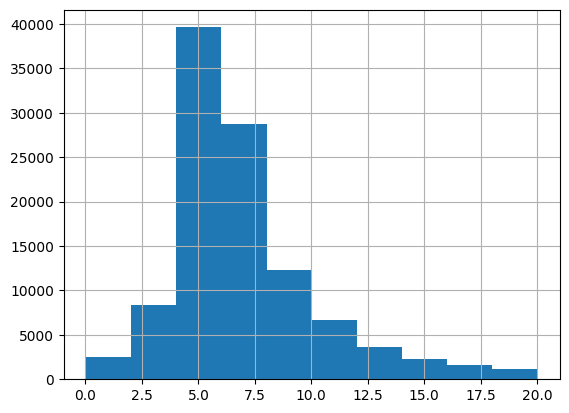

In [ ]:
ch['CHARGES'].hist()

In [ ]:
len(ch[ch['CHARGES'] < 0])

0

In [ ]:
ch[ch['CHARGES'] < 0]

,SUBSCRIBER_ID,BILL_MONTH,CHARGES


In [ ]:
abons[abons['SUBSCRIBER_ID'] == 5961]

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,tariff_number,start_dt,start_month,TARIFF_PLAN_ID_FIRST,START_DTTM_FIRST,count_prev,sum_prev,mean_prev,count_after,sum_after,mean_after,count_prev_sus,count_after_sus
5689,5961,3,2017-05-04 10:06:28,NaT,2.0,2017-05-04 10:06:28,2017-05-01,5,2017-02-28 11:08:29,3.0,18.036,6.012,3.0,48.48,16.16,3.0,2.0


In [ ]:
suspended[suspended['SUBSCRIBER_ID'] == 5961].sort_values('start_month_sus')

,SUBSCRIBER_ID,START_DT,END_DT,STATUS,start_month_sus
787,5961,2017-03-17,2017-03-24,Suspended,2017-03-01
663,5961,2017-04-20,2017-05-02,Suspended,2017-04-01
725,5961,2017-04-12,2017-04-13,Suspended,2017-04-01
601,5961,2017-05-13,2017-05-17,Suspended,2017-05-01
539,5961,2017-06-08,2017-06-18,Suspended,2017-06-01
477,5961,2017-07-20,2017-08-18,Suspended,2017-07-01
415,5961,2017-09-05,NaT,Suspended,2017-09-01


## Блокировки

<Axes: >

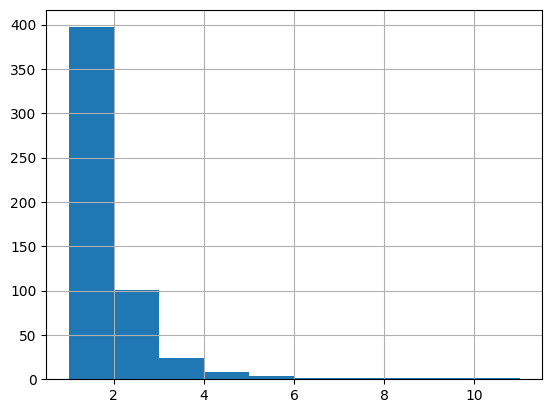

In [ ]:
abons['count_prev_sus'].hist()

<Axes: >

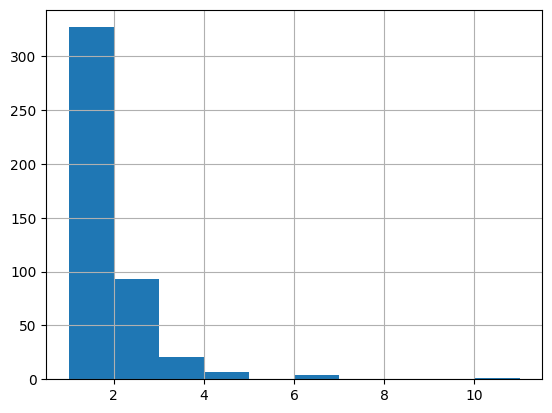

In [ ]:
abons['count_after_sus'].hist()

Аналогично п.2, только относительно изменения уровня блокировок: насколько реже или чаще стали попадать в блокировки абоненты после миграции в целом и для каждого направления миграции в отдельности. Для сравнения использовать те же периоды: 3 месяца до месяца смены плана и 3 месяца после месяца смены.

In [ ]:
abons.columns

Index(['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'START_DTTM', 'END_DTTM',
       'tariff_number', 'start_dt', 'start_month', 'TARIFF_PLAN_ID_FIRST',
       'START_DTTM_FIRST', 'count_prev', 'sum_prev', 'mean_prev',
       'count_after', 'sum_after', 'mean_after', 'count_prev_sus',
       'count_after_sus'],
      dtype='object')

In [ ]:
t = abons[['SUBSCRIBER_ID','count_prev_sus','count_after_sus']].count()

In [ ]:
t

SUBSCRIBER_ID      5718
count_prev_sus      542
count_after_sus     453
dtype: int64

In [ ]:
t / t['SUBSCRIBER_ID']

SUBSCRIBER_ID      1.000000
count_prev_sus     0.094788
count_after_sus    0.079224
dtype: float64

In [ ]:
abons[['SUBSCRIBER_ID','count_prev_sus','count_after_sus']].agg(['count','mean'])

,SUBSCRIBER_ID,count_prev_sus,count_after_sus
count,5718.000000,542.000000,453.000000
mean,2987.797307,1.450185,1.410596


In [ ]:
(1.455197 - 1.408034) / 1.455197

0.032410044825546

In [ ]:
t = (abons
     .groupby(['TARIFF_PLAN_ID_FIRST','TARIFF_PLAN_ID'])
     [['SUBSCRIBER_ID','count_prev_sus','count_after_sus']]
     .agg(['count','mean'])
     .reset_index())

In [ ]:
# Избавимся от мультиинндекса
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [ ]:
t['abon_sus_change'] = (t['count_after_sus_count'] - t['count_prev_sus_count']) / t['count_prev_sus_count']

In [ ]:
t['count_sus_change'] = (t['count_after_sus_mean'] - t['count_prev_sus_mean']) / t['count_prev_sus_mean']

In [ ]:
# При переходе с 3 тарифа на 5 (больше всего перходящих) - количество блокировок (проценит блокировок снизился на 30%)
t.sort_values('SUBSCRIBER_ID_count',ascending=False)

,TARIFF_PLAN_ID_FIRST_,TARIFF_PLAN_ID_,SUBSCRIBER_ID_count,SUBSCRIBER_ID_mean,count_prev_sus_count,count_prev_sus_mean,count_after_sus_count,count_after_sus_mean,abon_sus_change,count_sus_change
11,3,5,2296,2776.529181,194,1.453608,131,1.312977,-0.324742,-0.096746
3,1,5,1544,2797.187176,99,1.555556,82,1.524390,-0.171717,-0.020035
15,4,5,428,4482.742991,77,1.623377,68,1.470588,-0.116883,-0.094118
7,2,5,406,2759.044335,6,1.166667,18,1.444444,2.000000,0.238095
2,1,4,351,2990.430199,51,1.176471,39,1.307692,-0.235294,0.111538
10,3,4,305,3382.304918,79,1.303797,58,1.379310,-0.265823,0.057918
6,2,4,139,2795.553957,6,1.000000,21,1.428571,2.500000,0.428571
1,1,3,46,2945.478261,2,1.500000,1,1.000000,-0.500000,-0.333333
14,4,3,34,4324.117647,10,1.400000,8,1.500000,-0.200000,0.071429
18,5,3,26,4346.269231,2,2.500000,9,1.666667,3.500000,-0.333333
